In [5]:
import utils
import matplotlib.pyplot as plt
from sklearn import metrics

Accuracy:
	Fold 0: 0.4932
	Fold 1: 0.5890
	Fold 2: 0.5205
	Fold 3: 0.5616
	Fold 4: 0.4167
Average: 0.5162100456621004


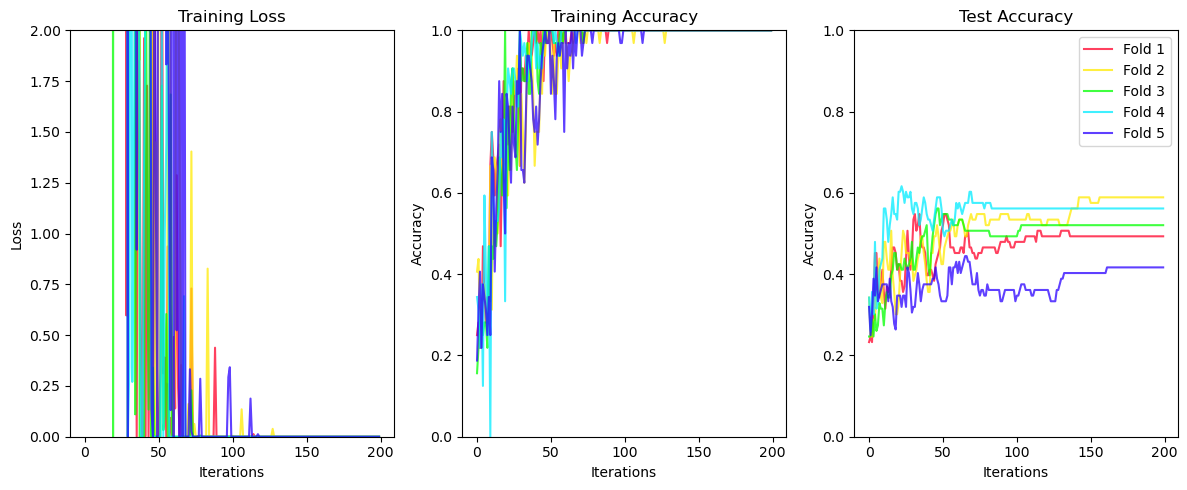

In [16]:
model_name = "vgg19"
cmap = plt.get_cmap("gist_rainbow")
accuracy = 0
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
print("Accuracy:")
for idx in range(5):
    data = utils.load_json(f"{model_name}_{idx}.json")
    utils.plot_loss_acc(
        axes,
        data["train_loss"],
        data["train_acc"],
        data["test_acc"],
        label=f"Fold {idx+1}",
        color=cmap(idx/5),
    )
    acc = metrics.accuracy_score(data["true"], data["predictions"])
    accuracy += acc
    print(f"\tFold {idx}: {acc:.4f}")
print("Average:", accuracy/5)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
data = utils.load_json(f"{model_name}_1.json")
print(metrics.classification_report(data['true'], data['predictions']))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        19
           1       0.61      0.58      0.59        19
           2       0.42      0.57      0.48        14
           3       0.78      0.67      0.72        21

    accuracy                           0.59        73
   macro avg       0.59      0.59      0.58        73
weighted avg       0.61      0.59      0.59        73



In [32]:
import json
print(json.dumps(metrics.classification_report(data['true'], data['predictions'], output_dict=True), indent=4))

{
    "0": {
        "precision": 0.7777777777777778,
        "recall": 0.7777777777777778,
        "f1-score": 0.7777777777777778,
        "support": 18
    },
    "1": {
        "precision": 0.7894736842105263,
        "recall": 0.75,
        "f1-score": 0.7692307692307692,
        "support": 20
    },
    "2": {
        "precision": 0.9444444444444444,
        "recall": 0.9444444444444444,
        "f1-score": 0.9444444444444444,
        "support": 18
    },
    "3": {
        "precision": 0.9444444444444444,
        "recall": 1.0,
        "f1-score": 0.9714285714285714,
        "support": 17
    },
    "accuracy": 0.863013698630137,
    "macro avg": {
        "precision": 0.8640350877192984,
        "recall": 0.8680555555555556,
        "f1-score": 0.8657203907203908,
        "support": 73
    },
    "weighted avg": {
        "precision": 0.8608908115036449,
        "recall": 0.863013698630137,
        "f1-score": 0.8616287821767273,
        "support": 73
    }
}
